**MACHINE LEARNING INTERNSHIP**


**TASK1: Predict Restaurant Ratings**


**Installing Required Libraries in One Go.**

In [ ]:
!pip install pandas numpy scikit-learn pyspark

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Loading the dataset
df = pd.read_csv("/content/Dataset.csv")

#Checking for the missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
#Handling Missing Values
for column in df.columns:
  if df[column].dtype == "object":
     df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
#Label Encoders for Categorical Variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
#Defining Features (X) and  Target (Y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

#Splitting the dataset into training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [ ]:
#Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#Evaluating Linear Regression Model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R2:", lr_r2)

Linear Regression MSE: 1.2186925059460247
Linear Regression R2: 0.4645719905617005


**Note:** *Here Linear Regression doesn't perform well among all other models*






In [ ]:
#Feature importance for Linear Regression
lr_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
print("Linear Regression Feature Importance:\n", lr_feature_importance.sort_values(by='Coefficient', ascending=False))

Linear Regression Feature Importance:
                  Feature   Coefficient
13   Has Online delivery  6.761170e-01
16           Price range  4.956777e-01
2           Country Code  6.645632e-03
7              Longitude  8.820727e-04
19                 Votes  4.864794e-04
6       Locality Verbose  7.526886e-05
1        Restaurant Name  2.217537e-06
10  Average Cost for two  1.393134e-06
15  Switch to order menu -1.110223e-16
0          Restaurant ID -3.727243e-08
4                Address -2.235244e-05
9               Cuisines -2.075413e-04
5               Locality -3.706328e-04
8               Latitude -1.241751e-03
3                   City -3.031383e-03
12     Has Table booking -6.530484e-03
14     Is delivering now -3.562173e-02
11              Currency -8.407780e-02
17          Rating color -1.951937e-01
18           Rating text -1.984145e-01


**Decision Tree Regressor**

In [ ]:
# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2:", dt_r2)

Decision Tree MSE: 0.057708006279434836
Decision Tree R2: 0.9746462025653753


In [ ]:
# Feature importance for Decision Tree
dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
})
print("Decision Tree Feature Importance:\n", dt_feature_importance.sort_values(by='Importance', ascending=False))

Decision Tree Feature Importance:
                  Feature  Importance
19                 Votes    0.898954
17          Rating color    0.084567
18           Rating text    0.004821
0          Restaurant ID    0.002320
7              Longitude    0.001450
1        Restaurant Name    0.001365
4                Address    0.001360
9               Cuisines    0.001279
8               Latitude    0.001043
10  Average Cost for two    0.000929
5               Locality    0.000681
6       Locality Verbose    0.000497
13   Has Online delivery    0.000242
3                   City    0.000240
16           Price range    0.000165
12     Has Table booking    0.000064
14     Is delivering now    0.000013
11              Currency    0.000006
2           Country Code    0.000004
15  Switch to order menu    0.000000


**Random Forest Regressor**

In [ ]:
#Model 3: Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
print("Random Forest Feature Importance:\n", rf_feature_importance.sort_values(by='Importance', ascending=False))

Random Forest MSE: 0.026831028257456785
Random Forest R2: 0.9882118877559511
Random Forest Feature Importance:
                  Feature  Importance
19                 Votes    0.898808
17          Rating color    0.082535
18           Rating text    0.007062
0          Restaurant ID    0.002245
7              Longitude    0.001407
1        Restaurant Name    0.001303
4                Address    0.001300
8               Latitude    0.001247
9               Cuisines    0.001198
10  Average Cost for two    0.000985
5               Locality    0.000594
6       Locality Verbose    0.000586
13   Has Online delivery    0.000279
3                   City    0.000190
16           Price range    0.000138
12     Has Table booking    0.000063
14     Is delivering now    0.000025
11              Currency    0.000024
2           Country Code    0.000014
15  Switch to order menu    0.000000


**Gradient Boosting Regressor**

In [ ]:
# Model:4 Gradient Boosting Regressor(GBR)
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
y_pred_gb = gb_model.predict(X_test)

In [ ]:
#Evaluating the GBR
gb_mse = mean_squared_error(y_test,y_pred_gb)
gb_r2 = r2_score(y_test,y_pred_gb)
print("Gradient Boosting MSE:",gb_mse)
print("Gradient Boosting R2_Score",gb_r2)

Gradient Boosting MSE: 0.025790386419378804
Gradient Boosting R2_Score 0.9886690898682


In [ ]:
#Feature Importance for GBR
gb_feature_importance = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':gb_model.feature_importances_
})
print("Gradient Boosting Feature Importance:\n",gb_feature_importance.sort_values(by='Importance',ascending=False))

Gradient Boosting Feature Importance:
                  Feature  Importance
19                 Votes    0.910397
17          Rating color    0.079193
18           Rating text    0.007419
0          Restaurant ID    0.001709
7              Longitude    0.000290
9               Cuisines    0.000221
13   Has Online delivery    0.000175
10  Average Cost for two    0.000153
8               Latitude    0.000151
16           Price range    0.000088
4                Address    0.000082
1        Restaurant Name    0.000051
6       Locality Verbose    0.000022
3                   City    0.000016
11              Currency    0.000014
14     Is delivering now    0.000009
2           Country Code    0.000006
5               Locality    0.000002
12     Has Table booking    0.000000
15  Switch to order menu    0.000000


**Result:** Among all other models Gradient boosting regressor performed well on the dataset.

# **Task 2**
# **`Restaurant Recommendation`**

In [ ]:
# Importing  necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Loading the dataset
df = pd.read_csv('/content/Dataset.csv')

# Checking  for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Handling  missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Label encoding for categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Defining the features for recommendations
features = ['Cuisines', 'Price range', 'Locality', 'Aggregate rating']

# Creating a new DataFrame for similarity computation based on the selected features
feature_df = df[features]

# Computing cosine similarity between restaurants
similarity_matrix = cosine_similarity(feature_df)

# Function to recommend restaurants based on user preferences
def recommend_restaurants(user_preference, num_recommendations=5):
    user_preference_encoded = user_preference.copy()
    for column in user_preference:
        if column in label_encoders:
            user_preference_encoded[column] = label_encoders[column].transform([user_preference[column]])[0]

    # Calculating similarity between user's preference and all restaurants
    user_vector = pd.DataFrame([user_preference_encoded], columns=features)
    user_similarity = cosine_similarity(user_vector, feature_df).flatten()

    # To Get top 'n' similar restaurants
    top_recommendations = user_similarity.argsort()[-num_recommendations:][::-1]

    # Printing recommended restaurants
    recommended_restaurants = df.iloc[top_recommendations]
    return recommended_restaurants[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating', 'Locality']]

# Example
user_preference = {
    'Cuisines': 'Italian',     # Replace with the user's preferred cuisine
    'Price range': 3,          # Replace with preferred price range
    'Locality': 'Athens',      # Replace with preferred location
    'Aggregate rating': 4.0    # Minimum rating
}

# Getting  restaurant recommendations
recommendations = recommend_restaurants(user_preference, num_recommendations=5)
print("Top 5 Restaurant Recommendations based on user preferences:")
print(recommendations)



Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Top 5 Restaurant Recommendations based on user preferences:
      Restaurant Name  Cuisines  Price range  Aggregate rating  Locality
115              3652      1031            3               4.1        77
118              6727      1027            3               4.1        77
2598             3921       497            1               2.5        37
132              4111      1104            2             

# **Task 3**



**Task: Cuisine Classification**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (replace with your dataset path)
df = pd.read_csv('/content/Dataset.csv')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Handle missing values: Fill 'Cuisines' column with the mode (most frequent value)
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

# Label encoding for categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features (X) and target (y)
X = df.drop('Aggregate rating', axis=1)  # Assuming 'Aggregate rating' is the target column
y = df['Aggregate rating']

# Convert the continuous 'Aggregate rating' into discrete categories for classification
y_discrete = pd.cut(y, bins=[0, 2, 4, 5], labels=[0, 1, 2])  # Example bins for low, medium, high ratings

# Check for missing values in the target variable after discretization
print("Missing values in target variable:\n", y_discrete.isnull().sum())

# Drop rows with NaN values in the target variable
X = X[~y_discrete.isnull()]
y_discrete = y_discrete.dropna()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------- Logistic Regression Model -------
logistic_model = LogisticRegression(max_iter=500)  # Increase max_iter to avoid convergence issue
logistic_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values in target variable:
 2148
Logistic Regression Accuracy: 0.9716407832545577
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98      1252
           2       0.85      1.00      0.92       229

    accuracy                           0.97      1481
   macro avg       0.92      0.98      0.95      1481
weighted avg       0.98

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (replace with your dataset path)
df = pd.read_csv('/content/Dataset.csv')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Handle missing values: Fill 'Cuisines' column with the mode (most frequent value)
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

# Label encoding for categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features (X) and target (y)
X = df.drop('Aggregate rating', axis=1)  # Assuming 'Aggregate rating' is the target column
y = df['Aggregate rating']

# Convert the continuous 'Aggregate rating' into discrete categories for classification
y_discrete = pd.cut(y, bins=[0, 2, 4, 5], labels=[0, 1, 2])  # Example bins for low, medium, high ratings

# Check for missing values in the target variable after discretization
print("Missing values in target variable:\n", y_discrete.isnull().sum())

# Drop rows with NaN values in the target variable
X = X[~y_discrete.isnull()]
y_discrete = y_discrete.dropna()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------- Logistic Regression Model -------
logistic_model = LogisticRegression(max_iter=500)  # Increase max_iter to avoid convergence issue
logistic_model.fit(X_train_scaled, y_train)

# Predict on test set for Logistic Regression
y_pred_lr = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# ------- Random Forest Model -------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train_scaled, y_train)

# Predict on test set for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values in target variable:
 2148
Logistic Regression Accuracy: 0.9716407832545577
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98      1252
           2       0.85      1.00      0.92       229

    accuracy                           0.97      1481
   macro avg       0.92      0.98      0.95      1481

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<ipython-input-12-7c3aeb9f0e9d>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Average Rating', y='City', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

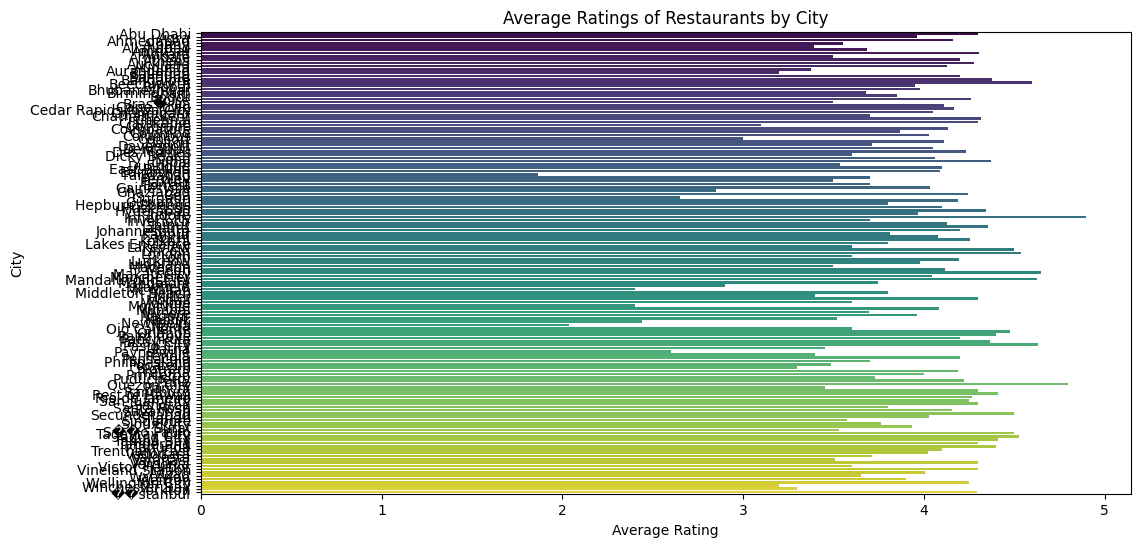

<ipython-input-12-7c3aeb9f0e9d>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Number of Restaurants', y='City', palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

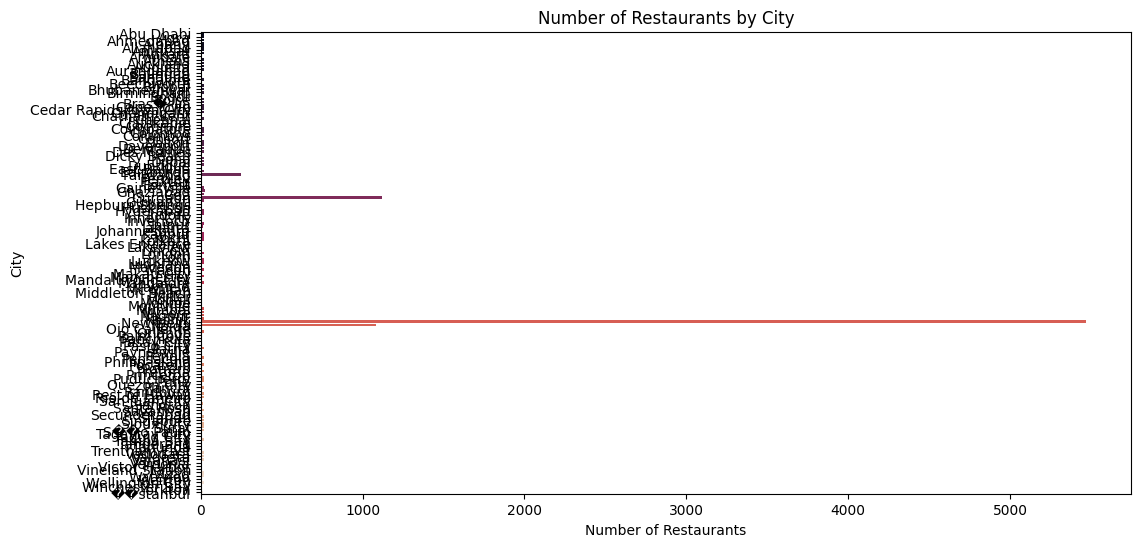

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the dataset (replace with your dataset path)
# If the dataset is in your Google Drive, make sure to mount the drive first
from google.colab import drive

# Replace 'Dataset.csv' with the actual path in your Google Drive
df = pd.read_csv('/content/Dataset.csv')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values in latitude and longitude
print("Missing values in Latitude and Longitude:\n", df[['Latitude', 'Longitude']].isnull().sum())

# Drop rows with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# ------- Visualize Distribution on a Map -------
# Create a folium map centered around the average coordinates
average_latitude = df['Latitude'].mean()
average_longitude = df['Longitude'].mean()

restaurant_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Add markers for each restaurant
for _, restaurant in df.iterrows():
    folium.Marker(
        location=[restaurant['Latitude'], restaurant['Longitude']],
        popup=restaurant['Restaurant Name'],
        icon=folium.Icon(color='blue')
    ).add_to(restaurant_map)

# Display the map in Colab
restaurant_map

# ------- Group by City or Locality -------
# Group restaurants by city/locality and calculate average ratings
grouped_data = df.groupby(['City']).agg({
    'Aggregate rating': 'mean',
    'Cuisines': 'count',  # Count of restaurants
    'Average Cost for two': 'mean'
}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['City', 'Average Rating', 'Number of Restaurants', 'Average Cost for Two']

# Display the grouped data
print("\nGrouped Data by City:\n", grouped_data)

# ------- Visualize Grouped Data -------
# Plot average ratings by city
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Average Rating', y='City', palette='viridis')
plt.title('Average Ratings of Restaurants by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

# Plot number of restaurants by city
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Number of Restaurants', y='City', palette='rocket')
plt.title('Number of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv('/content/Dataset.csv')

# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Handling  missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Label encoding for categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Defining  features 'X' and target 'y'
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating Linear Regression model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R2:", lr_r2)

# Feature importance for Linear Regression
lr_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
print("Linear Regression Feature Importance:\n", lr_feature_importance.sort_values(by='Coefficient', ascending=False))

#Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluating Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2:", dt_r2)

# Feature importance for Decision Tree
dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
})
print("Decision Tree Feature Importance:\n", dt_feature_importance.sort_values(by='Importance', ascending=False))

#Model 3: Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
print("Random Forest Feature Importance:\n", rf_feature_importance.sort_values(by='Importance', ascending=False))

#Model 4: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R2:", gb_r2)

# Feature importance for Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})
print("Gradient Boosting Feature Importance:\n", gb_feature_importance.sort_values(by='Importance', ascending=False))


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


<ipython-input-2-389d74b82647>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-2-389d74b82647>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Linear Regression MSE: 1.2186925059460247
Linear Regression R2: 0.4645719905617005
Linear Regression Feature Importance:
                  Feature   Coefficient
13   Has Online delivery  6.761170e-01
16           Price range  4.956777e-01
2           Country Code  6.645632e-03
7              Longitude  8.820727e-04
19                 Votes  4.864794e-04
6       Locality Verbose  7.526886e-05
1        Restaurant Name  2.217537e-06
10  Average Cost for two  1.393134e-06
15  Switch to order menu -1.110223e-16
0          Restaurant ID -3.727243e-08
4                Address -2.235244e-05
9               Cuisines -2.075413e-04
5               Locality -3.706328e-04
8               Latitude -1.241751e-03
3                   City -3.031383e-03
12     Has Table booking -6.530484e-03
14     Is delivering now -3.562173e-02
11              Currency -8.407780e-02
17          Rating color -1.951937e-01
18           Rating text -1.984145e-01
Decision Tree MSE: 0.05618524332810046
Decision Tree R2: 0.